# Data Preparation for NER

## Getting the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Starting off by reading in the skills list we are going to be using:

In [2]:
skills_list = []
with open('linkedin_skill.txt', encoding="utf8") as file:#read in the skills list
    for line in file:
        skills_list.append(line.strip('\n').lower())#remove the newline \n and make lower case
print(len(skills_list))#how many skills?

36941


Let's take a look at what it looks like:

In [3]:
skills_list[0:10]

['(isc)2',
 '.net',
 '.net clr',
 '.net compact framework',
 '.net framework',
 '.net remoting',
 '.net core',
 '.com',
 '.htaccess',
 '1-4 units']

Getting data for CV content

In [4]:
CV_data = pd.read_csv('UpdatedResumeDataSet.csv')#read in the CV list
CV_data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


Let's check what this text looks like

In [5]:
sample_text = CV_data['Resume'][0]#look at the first line
sample_text

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## Data Cleaning

Removing newlines and other punctuation we don't want - but keeping full stops as they are needed for some skills

In [6]:
string = 'â Willingness to accept the challenge'.encode("ascii", errors="ignore").decode()
string#test how to get rid of extra characters

' Willingness to accept the challenge'

In [7]:
sample_text = sample_text.replace('(','') #remove unwanted punctuation
sample_text = sample_text.replace(')','')
sample_text = sample_text.replace('\n',' ')
sample_text = sample_text.replace('\r',' ')
sample_text = sample_text.replace('*','')
sample_text = sample_text.replace(',',' ')
sample_text = sample_text.replace(':',' ')
sample_text = sample_text.replace('/',' ')
sample_text = sample_text.replace('  ',' ')
sample_text = sample_text.replace('   ',' ')
sample_text = sample_text.replace('    ',' ')
sample_text = sample_text.encode("ascii", errors="ignore").decode()

Converting to lower case for the word search

In [8]:
lower_sample_text = sample_text.lower()#make a lowercase version of the text

Separating out single and multiple words in the skills list

In [9]:
skills_single_words = []#list of single word skills
skills_multi_words = []#list of multi word skills
for i in skills_list:
    if ' ' in i:#it's multi word if there's a space
        skills_multi_words.append(i)
    else:
        skills_single_words.append(i)
skills_multi_words[0:10]

['.net clr',
 '.net compact framework',
 '.net framework',
 '.net remoting',
 '.net core',
 '1-4 units',
 '1-to-1 marketing',
 '100% financing',
 '1031 exchanges',
 '1099 preparation']

Replacing spaces with dashes in a list 

In [10]:
skills_dash = []
for i in skills_multi_words:
    i = i.replace(' ', '_')#now can switch multi words skills to one 'token' to be idenitifed
    skills_dash.append(i)
skills_dash[0:10]

['.net_clr',
 '.net_compact_framework',
 '.net_framework',
 '.net_remoting',
 '.net_core',
 '1-4_units',
 '1-to-1_marketing',
 '100%_financing',
 '1031_exchanges',
 '1099_preparation']

Now we can go through the sample text and replace multiple words with words separated by dashes

In [11]:
for i in range(len(skills_multi_words)):
    lower_sample_text = lower_sample_text.replace(skills_multi_words[i],skills_dash[i])
lower_sample_text#replace the multi words with one word, so text can be split into words

'skills programming_languages python pandas numpy scipy scikit-learn matplotlib sql java javascript jquery. machine_learning regression svm nave bayes knn random forest decision_trees boosting techniques cluster_analysis word embedding sentiment_analysis natural_language_processing dimensionality_reduction topic modelling lda nmf pca & neural nets. database visualizations mysql sqlserver cassandra hbase elasticsearch d3.js dc.js plotly kibana matplotlib ggplot tableau. others regular expression html css angular 6 logstash kafka python flask git docker computer_vision - open cv and understanding of deep_learning.education details data_science assurance associate data_science assurance associate - ernst & young llp skill details  javascript- exprience - 24 months jquery- exprience - 24 months python- exprience - 24 monthscompany details  company - ernst & young llp description - fraud_investigations and dispute services  assurance technology assisted review tar technology assisted review

Reassemble the skills list

In [12]:
skills_new_set = skills_single_words + skills_dash #new words set has multi-words skills with underscores to remove spaces
print(skills_new_set[20000])
print(skills_new_set[1])

dump_truck
.net


Split into separate words

In [13]:
split_sample = lower_sample_text.split(' ') #split text by words

## Test Sample

In [14]:
is_skill = []
is_skill_indices = []
count = 0 #count how many characters have been through
indices = []
for i in range(len(split_sample)):
    count1 = count 
    count  = count + len(split_sample[i])+1 #update no. characters by length of word and a space
    for j in range(len(skills_new_set)):
        if skills_new_set[j] == split_sample[i]: #match words
            print(skills_new_set[j],count1,count-1)
            indices.append((count1,count-1)) #get indices of word
            is_skill.append(1) 
        else:
            is_skill.append(0) 

programming_languages 7 28
python 29 35
pandas 36 42
numpy 43 48
scipy 49 54
scikit-learn 55 67
matplotlib 68 78
sql 79 82
java 83 87
javascript 88 98
machine_learning 107 123
forest 161 167
decision_trees 168 182
cluster_analysis 203 219
word 220 224
sentiment_analysis 235 253
natural_language_processing 254 281
dimensionality_reduction 282 306
lda 323 326
pca 331 334
database 350 358
mysql 374 379
cassandra 390 399
hbase 400 405
elasticsearch 406 419
d3.js 420 425
kibana 439 445
matplotlib 446 456
html 499 503
css 504 507
angular 508 515
logstash 518 526
kafka 527 532
python 533 539
flask 540 545
git 546 549
docker 550 556
computer_vision 557 572
data_science 636 648
data_science 669 681
llp 718 721
llp 871 874
fraud_investigations 889 909
technology 942 952
tar 969 972
technology 973 983
analytics 1051 1060
scratch 1163 1170
reviews 1277 1284
flow 1387 1391
research 1414 1422
classification 1443 1457
models 1458 1464
mining 1489 1495
tar 1616 1619
models 1735 1741
python 1823 1829
s

In [15]:
sample_text[282:306]#check some examples to see if it has orginal cases/spaces/etc.

'Dimensionality reduction'

In [16]:
sample_text[889:909]

'Fraud Investigations'

In [17]:
sample_text[969:972]

'TAR'

In [18]:
indices[0:10]

[(7, 28),
 (29, 35),
 (36, 42),
 (43, 48),
 (49, 54),
 (55, 67),
 (68, 78),
 (79, 82),
 (83, 87),
 (88, 98)]

## Preparing a function

In [19]:
#function to perform the above preprocessing steps
def get_indices(sample_text,skills_multi_words,skills_dash,skills_new_set):
    sample_text = sample_text.replace('(','')
    sample_text = sample_text.replace(')','')
    sample_text = sample_text.replace('\n',' ')
    sample_text = sample_text.replace('\r',' ')
    sample_text = sample_text.replace('*','')
    sample_text = sample_text.replace(',',' ')
    sample_text = sample_text.replace(':',' ')
    sample_text = sample_text.replace('/',' ')
    sample_text = sample_text.replace('  ',' ')
    sample_text = sample_text.replace('   ',' ')
    sample_text = sample_text.replace('    ',' ')
    sample_text = sample_text.encode("ascii", errors="ignore").decode()

    lower_sample_text = sample_text.lower()
    
    
    for i in range(len(skills_multi_words)):
        lower_sample_text = lower_sample_text.replace(skills_multi_words[i],skills_dash[i])
        
    split_sample = lower_sample_text.split(' ')
    
    is_skill_indices = []
    count = 0
    indices = []
    words = []
    for i in range(len(split_sample)):
        count1 = count 
        count  = count + len(split_sample[i])+1
        for j in range(len(skills_new_set)):
            if skills_new_set[j] == split_sample[i]:
                words.append(skills_new_set[j])
                indices.append((count1,count-1))
    return(sample_text,np.array(indices),words)
#return the cleaned text (cases and spaces preserved), the indices of the skill words, and the skill words

In [20]:
sample_text,indices,words = get_indices(CV_data['Resume'][0],skills_multi_words,skills_dash,skills_new_set)

Example of how spacy input should look - but we will save to a csv for the purposes of this assignment

In [21]:
data_dict={}
di={}
annotations = []
data_dict['content']=sample_text

#example dictionary constructions from the output arrays
for i in range(len(indices)):
    label_dict={}
    label_dict['label'] = 'SKILL'
    label_dict['points']  = di
    di['text'] = words[i]
    di['start'] = indices[i,0]
    di['end'] = indices[i,1]
    label_dict['points'] = di
    print(label_dict)


{'label': 'SKILL', 'points': {'text': 'programming_languages', 'start': 7, 'end': 28}}
{'label': 'SKILL', 'points': {'text': 'python', 'start': 29, 'end': 35}}
{'label': 'SKILL', 'points': {'text': 'pandas', 'start': 36, 'end': 42}}
{'label': 'SKILL', 'points': {'text': 'numpy', 'start': 43, 'end': 48}}
{'label': 'SKILL', 'points': {'text': 'scipy', 'start': 49, 'end': 54}}
{'label': 'SKILL', 'points': {'text': 'scikit-learn', 'start': 55, 'end': 67}}
{'label': 'SKILL', 'points': {'text': 'matplotlib', 'start': 68, 'end': 78}}
{'label': 'SKILL', 'points': {'text': 'sql', 'start': 79, 'end': 82}}
{'label': 'SKILL', 'points': {'text': 'java', 'start': 83, 'end': 87}}
{'label': 'SKILL', 'points': {'text': 'javascript', 'start': 88, 'end': 98}}
{'label': 'SKILL', 'points': {'text': 'machine_learning', 'start': 107, 'end': 123}}
{'label': 'SKILL', 'points': {'text': 'forest', 'start': 161, 'end': 167}}
{'label': 'SKILL', 'points': {'text': 'decision_trees', 'start': 168, 'end': 182}}
{'labe

Create the new columns:

In [22]:
CV_data['Cleaned_text'] = CV_data['Resume']
CV_data['indices'] =[ [] for _ in range(len(CV_data)) ]
CV_data['skill_words'] = [ [] for _ in range(len(CV_data)) ]
CV_data

,Category,Resume,Cleaned_text,indices,skill_words
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills * Programming Languages: Python (pandas...,[],[]
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details \r\nMay 2013 to May 2017 B.E...,[],[]
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","Areas of Interest Deep Learning, Control Syste...",[],[]
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,[],[]
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","Education Details \r\n MCA YMCAUST, Faridab...",[],[]
...,...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills: â¢ Proficient in MS office (...,[],[]
958,Testing,â Willingness to accept the challenges. â ...,â Willingness to accept the challenges. â ...,[],[]
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...","PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",[],[]
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,[],[]


Preparing the csv - this takes a little while (about 15-20 mins)

In [34]:
print('Running.....')
#apply function to every CV, update dataframe columns
for i in range(len(CV_data)):
    if i == 10:
        print('10 done')
    if i == 100:
        print('100 done')
    if i == 250:
        print('250 done')
    if i == 500:
        print('500 done')
    if i == 750:
        print('750 done')
    sample_text,indices,words = get_indices(CV_data['Resume'][i],skills_multi_words,skills_dash,skills_new_set)
    CV_data['Cleaned_text'][i] = sample_text
    CV_data['indices'][i] = [indices]
    CV_data['skill_words'][i] = [words]

Running.....
10 done
100 done
250 done
500 done
750 done


In [32]:
indices

array([[  13,   23],
       [  35,   43],
       [  44,   49],
       [  50,   60],
       [  78,   87],
       [  88,   97],
       [  98,  101],
       [ 102,  112],
       [ 113,  117],
       [ 118,  121],
       [ 122,  129],
       [ 130,  144],
       [ 145,  161],
       [ 168,  180],
       [ 185,  194],
       [ 245,  248],
       [ 368,  375],
       [ 388,  395],
       [ 701,  708],
       [ 744,  758],
       [ 770,  780],
       [ 796,  806],
       [ 836,  846],
       [ 863,  865],
       [ 882,  897],
       [ 899,  908],
       [ 954,  961],
       [ 996, 1007],
       [1031, 1036],
       [1037, 1047],
       [1048, 1057],
       [1058, 1068],
       [1084, 1092],
       [1136, 1152],
       [1173, 1180],
       [1187, 1194],
       [1213, 1224],
       [1262, 1279],
       [1293, 1300],
       [1301, 1307],
       [1308, 1315],
       [1340, 1348],
       [1355, 1374],
       [1395, 1402],
       [1429, 1439],
       [1468, 1479],
       [1511, 1516],
       [1517,

In [35]:
CV_data

,Category,Resume,Cleaned_text,indices,skill_words
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,"[[[7, 28], [29, 35], [36, 42], [43, 48], [49, ...","[[programming_languages, python, pandas, numpy..."
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B.E U...,"[[[464, 466], [654, 659], [663, 679], [729, 73...","[[ml, steps, machine_learning, encoding, featu..."
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,"[[[18, 31], [47, 65], [85, 94], [95, 110], [11...","[[deep_learning, design_programming, machinery..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA...,"[[[8, 9], [11, 17], [19, 27], [29, 36], [38, 4...","[[r, python, sap_hana, tableau, sap_hana, sql,..."
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Ha...,"[[[52, 64], [325, 333]]]","[[data_science, database]]"
...,...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word ...,"[[[0, 15], [34, 40], [41, 45], [46, 51], [52, ...","[[computer_skills, office, word, basic, excel,..."
958,Testing,â Willingness to accept the challenges. â ...,Willingness to accept the challenges. Positi...,"[[[347, 358], [490, 501], [570, 577], [587, 59...","[[electronics, electronics, testing, electroni..."
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to l...,"[[[90, 100], [408, 416], [628, 635], [665, 672...","[[leadership, research, testing, testing, tran..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,"[[[0, 15], [57, 63], [64, 65], [74, 84], [105,...","[[computer_skills, office, c, pcb_design, matl..."


Save the csv

In [46]:
CV_data['indices'] = CV_data['indices'].apply(lambda r: tuple(r)).apply(np.array)
CV_data

,Category,Resume,Cleaned_text,indices,skill_words
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,"[[[7, 28], [29, 35], [36, 42], [43, 48], [49, ...","[[programming_languages, python, pandas, numpy..."
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B.E U...,"[[[464, 466], [654, 659], [663, 679], [729, 73...","[[ml, steps, machine_learning, encoding, featu..."
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,"[[[18, 31], [47, 65], [85, 94], [95, 110], [11...","[[deep_learning, design_programming, machinery..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA...,"[[[8, 9], [11, 17], [19, 27], [29, 36], [38, 4...","[[r, python, sap_hana, tableau, sap_hana, sql,..."
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Ha...,"[[[52, 64], [325, 333]]]","[[data_science, database]]"
...,...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word ...,"[[[0, 15], [34, 40], [41, 45], [46, 51], [52, ...","[[computer_skills, office, word, basic, excel,..."
958,Testing,â Willingness to accept the challenges. â ...,Willingness to accept the challenges. Positi...,"[[[347, 358], [490, 501], [570, 577], [587, 59...","[[electronics, electronics, testing, electroni..."
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to l...,"[[[90, 100], [408, 416], [628, 635], [665, 672...","[[leadership, research, testing, testing, tran..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,"[[[0, 15], [57, 63], [64, 65], [74, 84], [105,...","[[computer_skills, office, c, pcb_design, matl..."


In [47]:
CV_data.columns

Index(['Category', 'Resume', 'Cleaned_text', 'indices', 'skill_words'], dtype='object')

In [36]:
CV_data.to_csv('Cleaned_data.csv') #save as csv

## Visualising Skills

In [25]:
skillwords_list = [item for sublist in CV_data['skill_words'] for item in sublist] #grab all the skill words
skillwords = pd.DataFrame({'SkillWords':skillwords_list})
value_counts = skillwords.value_counts().reset_index() # count which are the most common
value_counts

,SkillWords,count
0,project,3051
1,database,939
2,application,830
3,java,774
4,it,644
...,...,...
2118,nunit,1
2119,cucumber,1
2120,fuel,1
2121,agile_methodologies,1


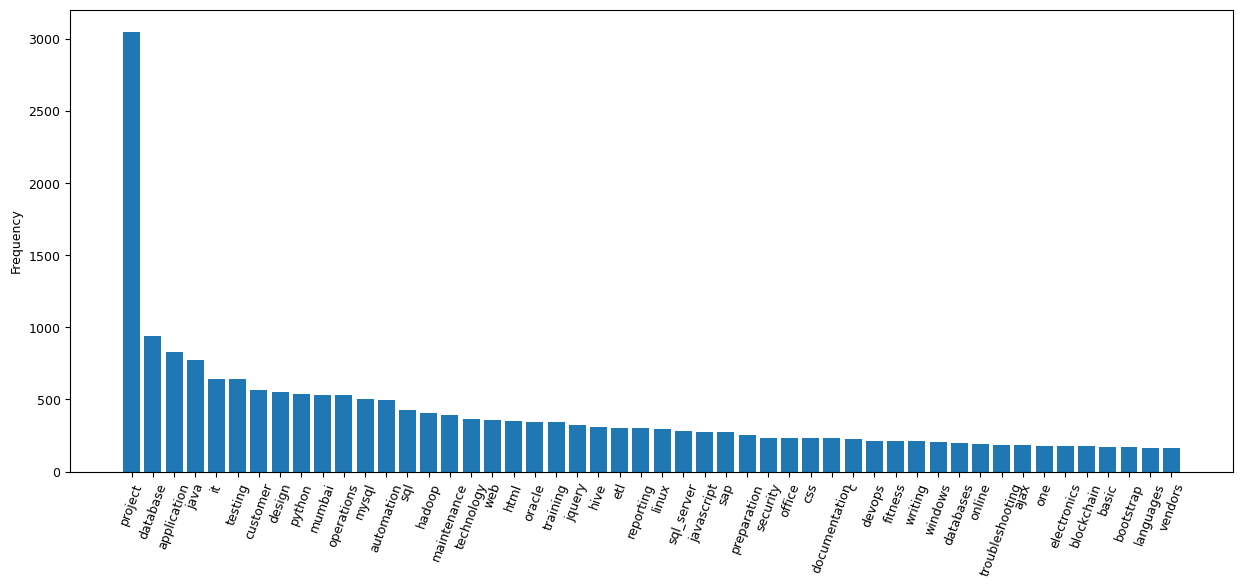

In [26]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',size=9)
plt.figure(figsize=(15,6))
plt.bar(value_counts['SkillWords'][0:50],value_counts['count'][0:50])
plt.xticks(rotation=70)
plt.ylabel('Frequency')
plt.show()

Showing the top 50 most annotated skills

In [27]:
pd.unique(CV_data['Category']) #what categories do we have?

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [29]:
#Top skills per category?